In [14]:
# WORK IN PROGRESS
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_csv('Arrest Data.csv')

In [15]:
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,200110044,03/27/2020,2125.0,1,Central,142,20,F,W,13.0,Prostitution/Allied,M,647(B)PC,PROSTITUTION,400 S FIGUEROA ST,NaN,"(34.0535, -118.256)"
1,200110045,04/01/2020,1800.0,1,Central,166,44,F,H,18.0,Drunkeness,M,41.27(C)LAM,DRINKING IN PUBLIC***,WINSTON ST,SAN PEDRO ST,"(34.0421, -118.2469)"
2,200110046,03/02/2020,1500.0,1,Central,157,37,M,B,17.0,Liquor Laws,I,25620BP,OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE,600 CROCKER ST,NaN,"(34.0417, -118.2443)"
3,200110199,04/07/2020,2300.0,1,Central,152,68,M,B,8.0,Other Assaults,M,243(A)PC,BATTERY ON PERSON,6TH ST,OLIVE ST,"(34.0481, -118.2542)"
4,200110228,04/09/2020,200.0,1,Central,119,44,M,H,24.0,Miscellaneous Other Violations,M,602(O)PC,TRESPASS ON CLOSED LANDS,00 GATEWAY PLAZA DR,NaN,"(34.0551, -118.2323)"


In [16]:
df['Time'] = df['Time'].round()
df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].str.replace(r'.0$', '')

In [17]:
if [df['Time'].str.len() >= 3]:
    df['Time'] = (df['Time'].str.replace(r'\d\d$', ''))

In [18]:
# Eventually clean up, zero padding may not be needed for everything
# Also in deliverable include the outliers like 00
df['Time'] = (df['Time'].str.replace(r'^1$', '01'))
df['Time'] = (df['Time'].str.replace(r'^2$', '02'))
df['Time'] = (df['Time'].str.replace(r'^3$', '03'))
df['Time'] = (df['Time'].str.replace(r'^4$', '04'))
df['Time'] = (df['Time'].str.replace(r'^5$', '05'))
df['Time'] = (df['Time'].str.replace(r'^6$', '06'))
df['Time'] = (df['Time'].str.replace(r'^7$', '07'))
df['Time'] = (df['Time'].str.replace(r'^8$', '08'))
df['Time'] = (df['Time'].str.replace(r'^9$', '09'))
df['Time'] = (df['Time'].str.replace(r'^$', '00'))
df['Time'] = (df['Time'].str.replace(r'^nan$', '00'))
df['Time'] = (df['Time'].str.replace(r'^0$', '00'))
df['Time'] = (df['Time'].str.replace(r'^24$', '00'))

In [19]:
# df['Date'] = df['Arrest Date'] + " " + df["Time"]
# df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y %H')

df['Date'] = df['Arrest Date']
df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y')

In [20]:
df['Descent Code'] = (df['Descent Code'].str.replace(r'^A$', 'Other Asian'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^B$', 'Black'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^C$', 'Chinese'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^D$', 'Cambodian'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^F$', 'Filipino'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^G$', 'Guamanian'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^H$', 'Latin'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^I$', 'American Indian/Alaskan Native'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^J$', 'Japanese'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^K$', 'Korean'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^L$', 'Laotian'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^O$', 'Other'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^P$', 'Pacific Islander'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^S$', 'Samoan'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^U$', 'Hawaiian'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^V$', 'Vietnamese'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^W$', 'White'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^X$', 'Unknown'))
df['Descent Code'] = (df['Descent Code'].str.replace(r'^Z$', 'Asian Indian'))

In [21]:
df.set_index('Date', inplace=True)
df.sort_index(ascending=False, inplace=True)
df

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
Date,,,,,,,,,,,,,,,,,
2020-04-11,5913993,04/11/2020,00,12,77th Street,1207,23,M,Latin,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,VERMONT AV,45TH ST,"(34.0027, -118.2915)"
2020-04-11,5914098,04/11/2020,11,1,Central,155,27,M,Latin,24.0,Miscellaneous Other Violations,F,3455(B)1PC,WARRANT-PETITION TO REVOKE COMMUNITY SUPVN,5TH,MAPLE,"(34.0454, -118.2466)"
2020-04-11,200309733,04/11/2020,09,3,Southwest,397,29,M,Black,NaN,NaN,M,11360H&S,NaN,4300 HALLDALE AV,NaN,"(34.0053, -118.3023)"
2020-04-11,5914022,04/11/2020,03,10,West Valley,1011,25,M,Latin,7.0,Vehicle Theft,F,487(D)(1)PC,GRAND THEFT AUTO/HORSE/ETC,7500 WYSTONE AV,NaN,"(34.207, -118.547)"
2020-04-11,5914036,04/11/2020,01,3,Southwest,356,20,F,Black,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,1600 W 36TH PL,NaN,"(34.0219, -118.3061)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01,2180372,01/01/2010,19,5,Harbor,527,51,M,Black,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,ANAHEIM,EUBANK,"(33.7805, -118.2533)"
2010-01-01,2179903,01/01/2010,03,15,N Hollywood,1587,41,M,Latin,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,CAHUENGA BL,REGAL,"(34.135, -118.3611)"
2010-01-01,2179750,01/01/2010,01,5,Harbor,564,48,M,Latin,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,1ST ST,PACIFIC AV,"(33.7433, -118.2879)"


In [22]:
# Evaluate columns and data again, then plot
df['Charge Group Description'].value_counts()

Miscellaneous Other Violations    248354
Narcotic Drug Laws                166428
Driving Under Influence           123312
Drunkeness                        116472
Aggravated Assault                 89307
Larceny                            72142
Other Assaults                     65890
Moving Traffic Violations          54353
Liquor Laws                        52566
Prostitution/Allied                40427
Disorderly Conduct                 37257
Weapon (carry/poss)                32258
Robbery                            27699
Vehicle Theft                      26083
Burglary                           24962
Sex (except rape/prst)             13733
Pre-Delinquency                    11904
Fraud/Embezzlement                  9891
Against Family/Child                7713
Forgery/Counterfeit                 7088
Non-Criminal Detention              6973
Receive Stolen Property             6820
Rape                                3082
Disturbing the Peace                2984
Homicide        

In [23]:
df['Charge Description'].value_counts()

DRUNK DRIVING ALCOHOL/DRUGS                 99906
DRINKING IN PUBLIC                          94131
CORPORAL INJURY ON SPOUSE/COHABITANT/ETC    48384
POSSESSION CONTROLLED SUBSTANCE             46215
FTA AFTER WRITTEN PROMISE                   31736
                                            ...  
DRIVING W/KNOWLEDGE OF LIC RESTRICTIONS         1
UNLAWFULLY DISTURB FUNERAL SERVICE              1
MAKE LEFT/U-TURN OVER CENTER DIVIDER            1
EXCEED ALLOWABLE WEIGHT                         1
FORTUNE TELLING                                 1
Name: Charge Description, Length: 2383, dtype: int64

In [24]:
df['count'] = df['Arrest Date'].groupby(df['Arrest Date']).transform('count')

In [31]:
# df = df[df.index.year >= 2020]
#df
df2 = df2[df2.index.year >= 2018]

In [26]:
df2 = df

In [27]:
df2 = df2.loc[~df2.index.duplicated(keep='first')]

In [28]:
df2

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,count
Date,,,,,,,,,,,,,,,,,,
2020-04-11,5913993,04/11/2020,00,12,77th Street,1207,23,M,Latin,22.0,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,VERMONT AV,45TH ST,"(34.0027, -118.2915)",7
2020-04-10,201210677,04/10/2020,20,12,77th Street,1241,33,M,Latin,NaN,NaN,M,647(B)2PC,NaN,64TH ST,FIGUEROA ST,"(33.9821, -118.3318)",53
2020-04-09,5913320,04/09/2020,00,20,Olympic,2062,37,M,Latin,8.0,Other Assaults,M,243(E)(1)PC,BATT EX-SPOUSE/FIANCEE/PERSN W/DATING REL,1000 S WESTERN AV,NaN,"(34.0506, -118.3127)",69
2020-04-08,200908283,04/08/2020,16,9,Van Nuys,923,28,M,Latin,NaN,NaN,M,11377(A)H&S,NaN,VESPER AV,HAMLIN,"(34.1887, -118.4509)",161
2020-04-07,5912330,04/07/2020,02,18,Southeast,1842,27,M,Black,24.0,Miscellaneous Other Violations,F,3056PC,VIOLATION OF PAROLE:FELONY,SAN PEDRO,99TH ST,"(33.9347, -118.2761)",118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-05,2184300,01/05/2010,17,13,Newton,1351,23,F,Latin,6.0,Larceny,M,484PC,THEFT FROM VEHICLE,4000 S MAIN ST,NaN,"(34.0111, -118.274)",412
2010-01-04,2182738,01/04/2010,12,17,Devonshire,1764,18,F,White,16.0,Narcotic Drug Laws,F,11352(A)HS,TRANSPORT/SELL/ETC CONTROLLED SUBSTANCE,TAMPA,PLUMMER,"(34.2428, -118.5536)",342
2010-01-03,2182025,01/03/2010,18,6,Hollywood,665,20,M,Black,16.0,Narcotic Drug Laws,M,11550(A)HS,UNDER INFLUENCE CNTL SUB,MC CADDEN,SANTA MONICA,"(34.0907, -118.3374)",308


In [29]:
# ax = sns.relplot(x=df2.index, y="count", kind="line", data=df2)

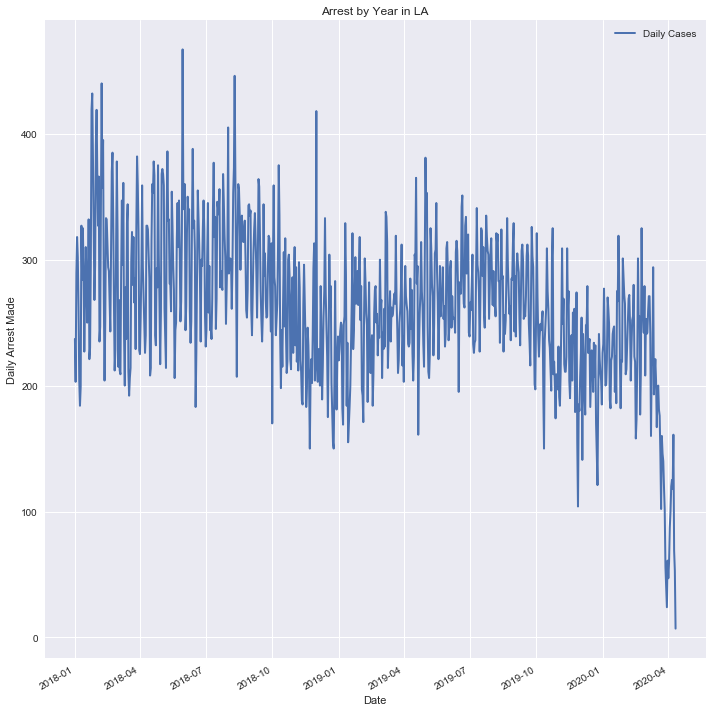

In [32]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add lines
ax.plot(df2.index.values,
         df2['count'], linewidth=2, label='Daily Cases')


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Daily Arrest Made",
       title="Arrest by Year in LA")

ax.legend()

fig.autofmt_xdate()

plt.tight_layout()

plt.savefig('Arrest In LA.png')

plt.show()